### Question 2

#Reading the data from the csv file

In [20]:
import pandas as pd

file = input("Enter the file name without extension: ")
filename = file + '.csv'
data = pd.read_csv(filename, index_col = 'Date', parse_dates = True)

data

Enter the file name without extension: ORNG1


,Open,High,Low,Close,AdjustedClose,Volume
Date,,,,,,
2017-01-03,57.900,58.165,57.380,58.075,54.595,230255200
2017-01-04,57.925,58.255,57.875,58.010,54.534,168944800
2017-01-05,57.960,58.430,57.905,58.305,54.812,177548800
2017-01-06,58.390,59.080,58.235,58.955,55.423,254015200
2017-01-09,58.975,59.715,58.970,59.495,55.930,268495200
...,...,...,...,...,...,...
2021-12-23,351.700,353.700,350.540,352.560,352.111,136713200
2021-12-27,354.180,360.840,354.140,360.660,360.201,149839200
2021-12-28,360.320,362.660,357.060,358.580,358.124,158288600


#Read these data into a DataFrame and augment the data with the daily returns of adjusted closing price

In [21]:
data1 = data[['AdjustedClose']]
data1['DailyReturns'] = data1['AdjustedClose'].pct_change()
data1

C:\Users\dwara\AppData\Local\Temp\ipykernel_17172\1592201329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['DailyReturns'] = data1['AdjustedClose'].pct_change()


,AdjustedClose,DailyReturns
Date,,
2017-01-03,54.595,NaN
2017-01-04,54.534,-0.001117
2017-01-05,54.812,0.005098
2017-01-06,55.423,0.011147
2017-01-09,55.930,0.009148
...,...,...
2021-12-23,352.111,0.003643
2021-12-27,360.201,0.022976
2021-12-28,358.124,-0.005766


#Plot a histogram of the daily returns

<Axes: ylabel='Frequency'>

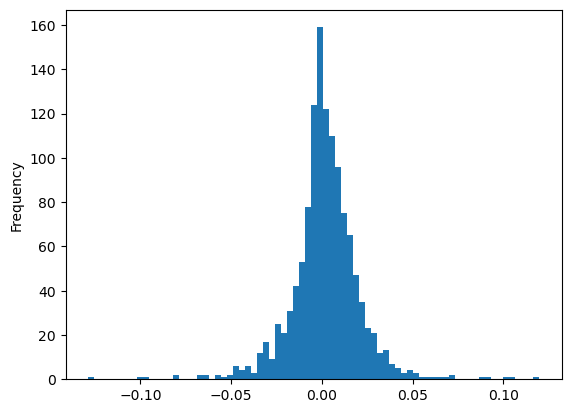

In [22]:
data1['DailyReturns'].plot(kind = 'hist', bins = 75)

#Calculate the skewness and kurtosis of the ORNG daily returns

In [23]:
print(f"Skewness : {round(data1.DailyReturns.skew(),2)}")
print(f"Kurtosis : {round(data1.DailyReturns.kurt(),2)}")

Skewness : -0.1
Kurtosis : 6.65


In [25]:
data1 = data1[1:]
data1

,AdjustedClose,DailyReturns
Date,,
2017-01-05,54.812,0.005098
2017-01-06,55.423,0.011147
2017-01-09,55.930,0.009148
2017-01-10,55.987,0.001019
2017-01-11,56.288,0.005376
...,...,...
2021-12-23,352.111,0.003643
2021-12-27,360.201,0.022976
2021-12-28,358.124,-0.005766


In [11]:
from scipy.stats import linregress

beta, alpha, rvalue, pvalue, stderr = linregress(data1.AdjustedClose, data1.DailyReturns)


In [19]:
print(f"Beta : {round(beta,4)}")
print(f"Alpha : {round(alpha,4)}")
print(f"R-squared : {round(pow(rvalue,2) * 100,2)}%")
print(f"p-value : {round(pvalue,4)}")
print(f"standard error : {round(stderr,4)}")

Beta : 0.0
Alpha : 0.0006
R-squared : 0.1%
p-value : 0.2622
standard error : 0.0


In [17]:
if pvalue > alpha:
    print("The daily returns doesn't follow normal distribution")
else:
    print("The daily returns follow normal distribution with 95% confidence")

The daily returns doesn't follow normal distribution


#Based on the standard deviation of the daily returns, identify those dates and returns that were smaller than -3 standard deviations or larger than +3 standard deviations

In [14]:
data1_sd = data1.DailyReturns.std()
round(data1_sd,3)

0.019

In [15]:
data1[data1.DailyReturns > (data1_sd*3)]

,AdjustedClose,DailyReturns
Date,,
2017-02-01,60.518,0.060975
2018-08-01,97.002,0.058916
2018-12-26,76.191,0.070414
2019-01-30,80.108,0.068335
2020-03-02,147.380,0.093104
2020-03-10,140.736,0.072021
2020-03-13,137.101,0.119804
2020-03-24,121.767,0.100331
2020-04-06,129.456,0.087235


In [16]:
data1[data1.DailyReturns < (-data1_sd*3)]

,AdjustedClose,DailyReturns
Date,,
2018-11-02,100.231,-0.066324
2019-01-03,68.930,-0.099602
2019-05-13,90.766,-0.058122
2020-02-27,134.906,-0.065373
2020-03-09,131.281,-0.079092
2020-03-12,122.433,-0.098750
2020-03-16,119.463,-0.128650
2020-03-20,113.066,-0.063488
2020-09-03,239.560,-0.080059
